# U.T.5 Aprendizaje supervisado (II).
## Introducción
Son las técnicas que nos permiten descubrir la estructura intrínseca de los datos sin conocer de antemano la solución.

## k-means y k-means++
### K-MEANS
Para cada bloque se buscará el centroide (el punto en media) o el mediode (el punto más representativo) y se minimizará
la distancia con el resto de puntos para formar los grupos.
Especialmente bueno para divisiones esféricas.

El mayor problema es que debemos establecer a priori el número de grupos (k) a crear, no se deducen de los datos
además de que alguno pueda estar vacío y que no se ajusta bien a datos con diferentes tamaños, densidades o formas
no esféricas.

Deberemos asegurarnos que todas las características están medidas aplicando la misma escala, por lo que habrá que
hacer una estandarización o un escalado Max-min

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)

### KmeNS +
Mejora el algoritmo anterior aplicando la estrategia de situar los centroides lo más separados posibles unos de otros,
 haciendo que converja mejor y sea más consistente en sus resultados

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)

y_km = km.fit_predict(X)


## FMC
Este algoritmo en vez de utilizar una asignación dura de puntos (solo en un clúster) permite que un ejemplo pertenezca
a varios clústeres (asignación débil).

Proporcionan porcentajes de proximidad para un ejemplo en cada clúster

In [ ]:
# https://pythonhosted.org/scikit-fuzzy/

fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

## DBSCAN
No predispone nada sobre la forma de los clúster, pudiendo ser de cualquier forma.

Asigna clústeres en función de la densidad de zonas a partir de un radio específico bien separadas con áreas de
baja densidad de puntos.

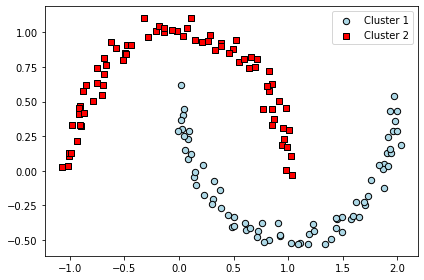

In [1]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import datasets

X, y = datasets.make_moons(n_samples=150, noise=.05)

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black',
            label='Cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black',
            label='Cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

## Árbol Jerárquico
Las dos aproximaciones más comunes de los árboles jerárquicos son acumulativos y divisibles.

Divisibles empezamos con un cluster grande y lo vamos dividiendo haciéndolos más pequeños .

En los acumulativos es al revés. Las dos implementaciones que se utilizan son single linkage y complete linkage.
En el primero calculamos las distancias entre los miembros más similares para cada par de clusters y los unimos.
En el segundo en vez de calcular las distancias entre los más similares, se miden los menos similares.

In [ ]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

## Elección del número de clusters
### Inercia
Uno de los mayores retos de estos algoritmos es determinar el número de clústeres.
Podemos usar un conjunto de técnicas gráficas (métricas) para determinar el número más apropiado.

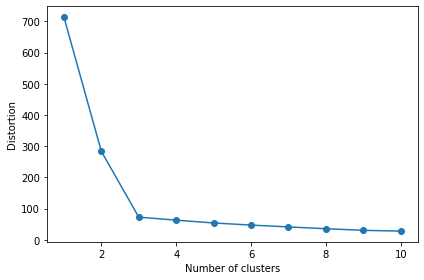

In [3]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

X, y = make_blobs(n_samples=150,n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10,
                max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

Se usa la medida de inercia, accesible a través del parámetro inertia_ de los algoritmos.

Fijar como óptimo aquel valor en el que la pendiente cambie drásticamente a otra más plana (El tres).

### gráficos silhouette
Intentan describir el tamaño de cada clúster con respecto a los demás basados en un coeficiente.

![](img/ut05_00.png)

Vemos la representación para 4 tipos de clústeres, siendo k=4 y k=5 los que deberíamos elegir, estando mejor situado
k=5 al tener todos las clases por encima de la media del coeficiente silhouette (línea de puntos) y estar más balanceado.

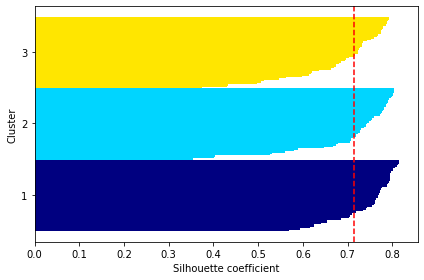

In [4]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150,n_features=2, centers=3,
                  cluster_std=0.5, shuffle=True, random_state=0)

km = KMeans(n_clusters=3,  init='k-means++', n_init=10,
            max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)


cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
		c_silhouette_vals, height=1.0,
		edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

## Otros algoritmos
![](img/ut05_01.png)

![](img/ut05_02.png)